In [1]:
import pandas as pd
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


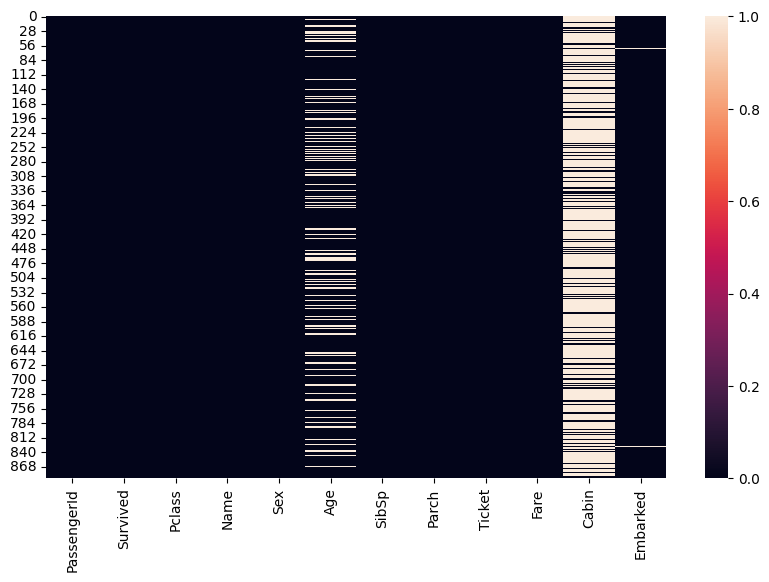

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull())
plt.show()

In [4]:
train_age_nan_percent = train_df['Age'].isnull().mean() * 100

print(f"Il y a {train_age_nan_percent:.2f}% d'age manquant")

Il y a 19.87% d'age manquant


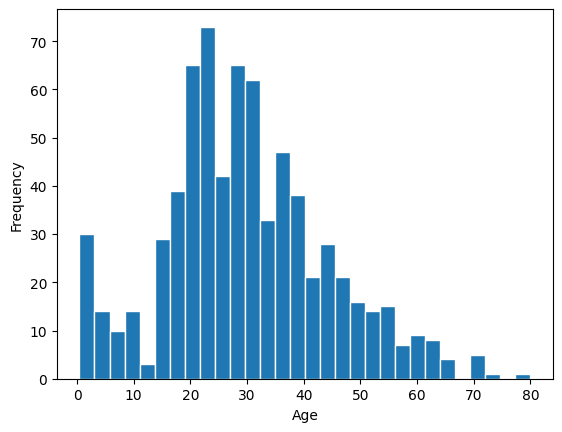

In [5]:
train_df['Age'].plot(kind='hist', bins=30, edgecolor='white')
plt.xlabel('Age')
plt.show()

In [6]:

print('Moyenne:  %.2f' %(train_df["Age"].mean(skipna=True)))
print('Médiane: %.2f' %(train_df["Age"].median(skipna=True)))

Moyenne:  29.70
Médiane: 28.00


In [7]:
train_cabine_percent = train_df['Cabin'].isnull().mean() * 100

print(f"Il y a {train_cabine_percent:.2f}% de Cabin qui manquent")

Il y a 77.10% de Cabin qui manquent


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


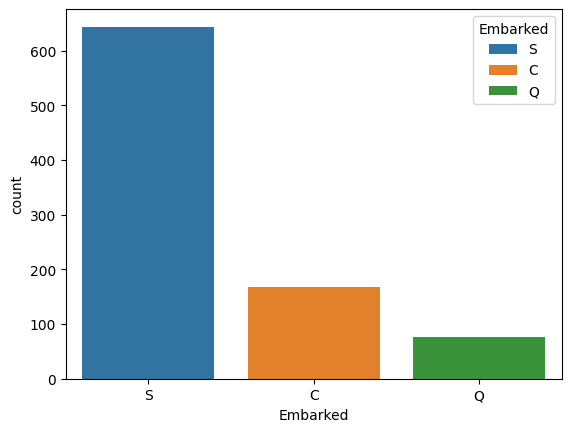

In [8]:
print("Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):")
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, hue='Embarked')
plt.show()

In [13]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

train_data.isnull().sum()


/var/folders/sy/61l6zqtd64j1gyrf9x411hmw0000gn/T/ipykernel_93588/2020069186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
/var/folders/sy/61l6zqtd64j1gyrf9x411hmw0000gn/T/ipykernel_93588/2020069186.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

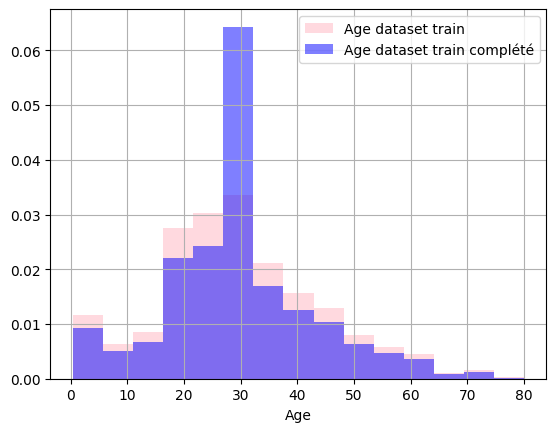

In [29]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='pink', alpha=0.6)
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='blue', alpha=0.5)
ax.legend(['Age dataset train', 'Age dataset train complété'])
ax.set(xlabel='Age')
plt.show()

In [36]:
train_data['TravelAlone'] = (train_data['SibSp'] + train_df['Parch']) == 0
train_data['TravelAlone'] = train_data['TravelAlone'].astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
